In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KernelDensity


df = pd.read_csv('/Users/shtosti/Dropbox/study/UZH/FW23/SMA/topic_modelling_DEPO/data/with_clean_keybert_bigrams.csv')
df.head(1)



,clean_text,tokenized_text,religion,spirituality,bigram_keyphrases,cleaned_bigrams
0,attayyiby barackobama youtube the phrase that ...,"['attayyiby', 'barackobama', 'youtube', 'phras...",True,False,"[('away reality', 0.6107), ('reality religion'...","['away reality', 'reality religion', 'people r..."


In [3]:
# Tokenize and preprocess text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

# Get the vocabulary (words)
words = vectorizer.get_feature_names_out()

# Calculate word frequencies
word_frequencies = X.sum(axis=0).A1

/var/folders/c_/d2jd7yn50y93c2sqyws6yswc0000gn/T/ipykernel_26539/4043533533.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap="Blues", shade=True, levels=15)


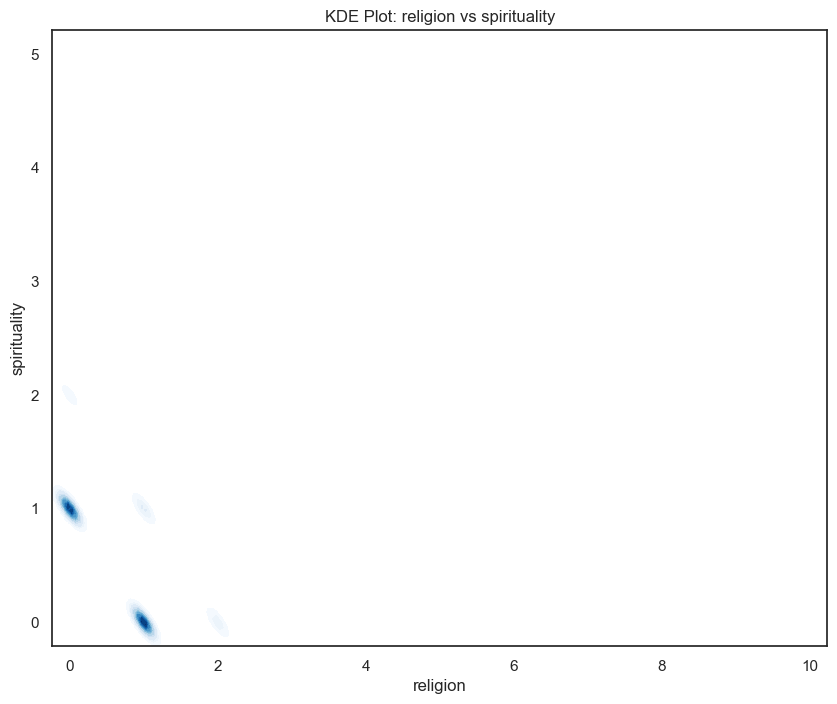

In [7]:


# Choose two words to visualize
word1 = 'religion'
word2 = 'spirituality'

# Extract word indices
word1_idx = vectorizer.vocabulary_[word1]
word2_idx = vectorizer.vocabulary_[word2]

# Create a 2D array with word frequencies for the selected words
data = X[:, [word1_idx, word2_idx]].A

# Apply KDE to the data
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(data)

# Create a grid for visualization
xmin, xmax = min(data[:, 0]), max(data[:, 0])
ymin, ymax = min(data[:, 1]), max(data[:, 1])

x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([x.ravel(), y.ravel()])

# Calculate the KDE values
values = np.exp(kde.score_samples(positions.T))

# Reshape the values back to the grid shape
z = np.reshape(values, x.shape)

# Create a KDE plot
sns.set(style="white")
plt.figure(figsize=(10, 8))
# sns.kdeplot(data[:, 0], data[:, 1], cmap="Blues", shade=True, levels=15)
sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap="Blues", shade=True, levels=15)
plt.title(f'KDE Plot: {word1} vs {word2}')
plt.xlabel(word1)
plt.ylabel(word2)
plt.show()

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KernelDensity

# Load the dataset
df = pd.read_csv('/Users/shtosti/Dropbox/study/UZH/FW23/SMA/topic_modelling_DEPO/data/with_clean_keybert_bigrams.csv')

# Tokenize and preprocess text data
vectorizer = CountVectorizer(max_features=200)  # Limit to the top 200 words
X = vectorizer.fit_transform(df['clean_text'])

# Apply KDE to the data
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(X.A)

# Create a grid for visualization
xmin, xmax = np.min(X.A), np.max(X.A)
ymin, ymax = np.min(X.A), np.max(X.A)

x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([x.ravel(), y.ravel()])

# Calculate the KDE values
values = np.exp(kde.score_samples(positions.T))

# Reshape the values back to the grid shape
z = np.reshape(values, x.shape)

# Create a KDE plot
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.kdeplot(data=X.A.ravel(), cmap="Blues", shade=True, levels=15)
plt.title('KDE Plot: Top 200 Words')
plt.xlabel('Words')
plt.show()


ValueError: X has 2 features, but KernelDensity is expecting 200 features as input.